In [83]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [84]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\4-gauss\4-gauss_AE_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.16134,0.067351,3.53370,0.469590,0.67908,3.43440,2.79240,2.77630,1.69910,3.815600,1.746400
1,-0.098505,NaN,2.062800,NaN,NaN,1.17850,NaN,1.38880,NaN,NaN,0.772910,0.641450
2,-0.169460,0.50153,2.470900,3.06500,1.567600,1.48240,0.92160,2.64240,1.51870,2.53180,2.432800,1.876800
3,-0.136050,0.47279,0.588090,1.95630,2.787000,2.59570,2.89330,1.53750,0.99942,3.65930,0.618250,3.265800
4,0.098830,NaN,NaN,1.63120,3.554100,2.27110,NaN,NaN,NaN,NaN,1.026900,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.68670,1.576000,0.55612,0.070769,2.07470,0.80304,3.22290,3.49330,1.32550,3.231100,0.005387
796,3.466600,-4.03460,3.100400,1.34610,1.377300,2.28870,0.39613,2.39610,2.46350,1.66750,2.461700,1.226700
797,3.344800,NaN,2.031000,2.26460,NaN,NaN,NaN,0.74027,2.49540,NaN,NaN,1.585300
798,3.441400,-5.21630,1.577000,1.84400,1.098700,3.42430,0.81081,3.72700,1.18790,0.95112,1.884500,1.143700


In [85]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	133
float64		column 2	211
float64		column 3	104
float64		column 4	104
float64		column 5	78
float64		column 6	130
float64		column 7	211
float64		column 8	156
float64		column 9	234
float64		column 10	211
float64		column 11	185
float64		column 12	133


In [86]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,667.000000,589.00000,696.000000,696.000000,722.000000,670.000000,589.000000,644.000000,566.000000,589.000000,615.000000,667.000000
mean,1.444531,1.20726,1.967999,1.948140,1.986033,2.016181,1.931126,1.985723,1.985592,2.002440,1.919073,1.962697
std,2.723167,3.64044,1.147195,1.161565,1.166120,1.144630,1.175334,1.134357,1.133109,1.146232,1.191195,1.123173
min,-4.692600,-6.95290,0.023586,0.002628,0.021103,0.001674,0.005922,0.004193,0.009369,0.002484,0.002000,0.000288
25%,-0.449520,-1.95910,1.005092,0.933975,0.975450,1.019275,0.926700,0.978542,1.062325,1.053200,0.820200,1.012000
50%,0.417450,0.50153,1.983000,1.938900,2.021450,1.994200,1.932500,1.993550,1.994150,2.049000,1.887800,1.939100
75%,3.947300,4.47640,2.900625,2.944275,2.989075,3.079475,2.941500,2.895350,2.981925,2.994000,2.967750,2.871750
max,6.982200,7.69100,3.992600,3.997300,3.998500,3.997500,3.997800,3.998200,3.996200,3.998800,3.990900,3.998300


<AxesSubplot:>

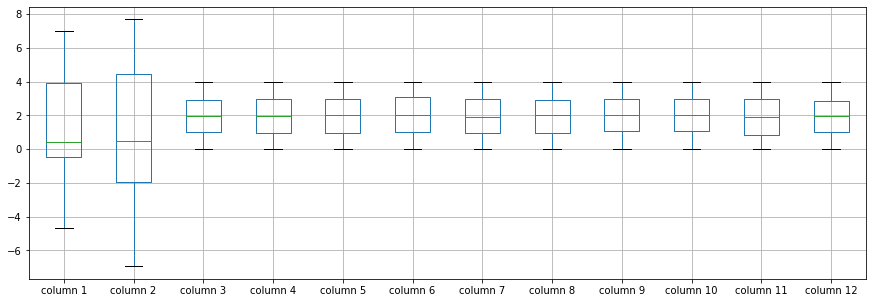

In [87]:
df.boxplot(return_type='axes', figsize=(15,5))

In [88]:
df.mean()

column 1     1.444531
column 2     1.207260
column 3     1.967999
column 4     1.948140
column 5     1.986033
column 6     2.016181
column 7     1.931126
column 8     1.985723
column 9     1.985592
column 10    2.002440
column 11    1.919073
column 12    1.962697
dtype: float64

In [89]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,-0.377398,-0.022787,0.001373,0.056308,0.036540,0.033268,0.022456,-0.018060,0.006807,0.026107,0.028033
column 2,-0.377398,1.000000,0.018152,-0.048759,-0.019446,-0.000593,0.056112,-0.023289,-0.007124,-0.047435,-0.068392,0.067166
column 3,-0.022787,0.018152,1.000000,-0.059938,0.088068,-0.029574,-0.001846,-0.023787,-0.027270,0.002292,0.018323,-0.014111
column 4,0.001373,-0.048759,-0.059938,1.000000,-0.001267,-0.035497,0.038654,0.035230,-0.034438,0.062086,0.051069,-0.021788
column 5,0.056308,-0.019446,0.088068,-0.001267,1.000000,0.042979,-0.031599,0.010703,-0.051650,0.003587,0.009333,-0.000520
column 6,0.036540,-0.000593,-0.029574,-0.035497,0.042979,1.000000,-0.074619,0.084167,0.007665,-0.030693,0.007516,-0.023081
column 7,0.033268,0.056112,-0.001846,0.038654,-0.031599,-0.074619,1.000000,0.023006,-0.086184,-0.032620,-0.052775,-0.042715
column 8,0.022456,-0.023289,-0.023787,0.035230,0.010703,0.084167,0.023006,1.000000,-0.045914,-0.091268,0.028808,-0.053550
column 9,-0.018060,-0.007124,-0.027270,-0.034438,-0.051650,0.007665,-0.086184,-0.045914,1.000000,0.091781,0.009538,-0.037999
column 10,0.006807,-0.047435,0.002292,0.062086,0.003587,-0.030693,-0.032620,-0.091268,0.091781,1.000000,-0.064770,0.074535


In [90]:
#column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12']
#df = pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\4-gauss\4-gauss_AE_1.xlsx', header=None,names=column_names)


In [91]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [92]:
imputer = md.Midas(layer_structure = [12,12+70,12+70+70,12+70+70+70,12+70+70+70+70,12+70+70+70+70+70,12+70+70+70+70,12+70+70+70,12+70+70,12+70,12], vae_layer = False, seed = 100)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 23.560843353271483
Epoch: 1 , loss: 23.22562168121338
Epoch: 2 , loss: 20.21133071899414
Epoch: 3 , loss: 18.889794006347657
Epoch: 4 , loss: 18.36594633102417
Epoch: 5 , loss: 18.17473268508911
Epoch: 6 , loss: 17.802482891082764
Epoch: 7 , loss: 17.61669277191162
Epoch: 8 , loss: 17.442047271728516
Epoch: 9 , loss: 17.07946996688843
Epoch: 10 , loss: 17.119006156921387
Epoch: 11 , loss: 16.959785690307616
Epoch: 12 , loss: 16.685295124053955
Epoch: 13 , loss: 16.594160499572755
Epoch: 14 , loss: 16.52186647415161
Epoch: 15 , loss: 16.313166999816893
Epoch: 16 , loss: 16.240311546325685
Epoch: 17 , loss: 16.192648639678954
Epoch: 18 , loss: 16.159657535552977
Epoch: 19 , loss: 16.00132104873657
Epoch: 20 , loss: 15.681551456451416
Epoch: 21 , loss: 16.054648056030274
Epoch: 22 , loss: 15.78401222229004
Epoch: 23 , loss: 15.962478427886962
Epoch: 24 , loss: 15.7146026802063
Epoch: 25 , loss: 15.7069732

In [93]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(800, 12)

In [94]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.463080
column 2     0.895821
column 3     3.034900
column 4     1.574783
column 5     1.609471
column 6     1.625954
column 7     1.670000
column 8     0.755510
column 9     2.032100
column 10    1.584392
column 11    0.230250
column 12    1.617328
Name: 21, dtype: float64

In [95]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\4-gauss.xlsx', header=None,names=column_names)

In [96]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.0,0.936144,0.000000,-1.648674,0.842654,0.000000,-0.394103,0.000000,-1.938296,-1.659439,0.000000,0.0
2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.0,0.672714,0.938751,0.000000,0.000000,0.000000,0.911230,-0.735697,0.097513,0.355767,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
796,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
797,0.0,3.407128,0.000000,0.000000,-1.768508,0.064731,0.319597,0.000000,0.000000,0.230580,-0.100578,0.0
798,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


Calculating NRMSE Value

In [97]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [98]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [99]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

83.35631472143588

In [100]:
denominator=Frobenius_norm(complete_df)
denominator

248.22200824735242

In [102]:
NRMS=numerator/denominator
NRMS


0.3358135538020931

In [103]:
new_df.iloc[66,:]

column 1     0.20762
column 2    -0.55052
column 3     2.33990
column 4     1.79480
column 5     1.40130
column 6     2.76580
column 7     1.30410
column 8     1.24930
column 9     1.05940
column 10    1.28430
column 11    1.87940
column 12    0.57524
Name: 66, dtype: float64

In [104]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.161340,0.067351,3.533700,0.469590,0.679080,3.434400,2.792400,2.776300,1.699100,3.815600,1.746400
1,-0.098505,0.757574,2.062800,1.272926,1.267374,1.178500,1.286097,1.388800,1.278404,1.264161,0.772910,0.641450
2,-0.169460,0.501530,2.470900,3.065000,1.567600,1.482400,0.921600,2.642400,1.518700,2.531800,2.432800,1.876800
3,-0.136050,0.472790,0.588090,1.956300,2.787000,2.595700,2.893300,1.537500,0.999420,3.659300,0.618250,3.265800
4,0.098830,0.906894,1.368451,1.631200,3.554100,2.271100,1.285480,1.442903,1.411513,1.418967,1.026900,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.686700,1.576000,0.556120,0.070769,2.074700,0.803040,3.222900,3.493300,1.325500,3.231100,0.005387
796,3.466600,-4.034600,3.100400,1.346100,1.377300,2.288700,0.396130,2.396100,2.463500,1.667500,2.461700,1.226700
797,3.344800,1.022828,2.031000,2.264600,1.572692,1.601731,1.545197,0.740270,2.495400,1.573880,1.521922,1.585300
798,3.441400,-5.216300,1.577000,1.844000,1.098700,3.424300,0.810810,3.727000,1.187900,0.951120,1.884500,1.143700


In [105]:
imputations[-1].to_excel("4-gauss_AE_10(imp).xlsx", index=False, header=False)